# 1.
1.
Итак, вы выявили аномалии, отфильтровали данные, создали показатели для типичного времени заезда и изучили влияние большого числа аномальных заездов на эти показатели. Проверьте всё ещё разок, прежде чем делиться результатами. Для начала визуализируйте распределение лучших показателей заездов с типичной продолжительностью по сетям АЗС.
Выполните следующие шаги, используя чистый код. Не вводите вспомогательные переменные — помните о бритве Оккама:
Упорядочьте таблицу final_stat по возрастанию лучших показателей из столбца median_time. median_time— это медиана для распределения медианной продолжительности заправки по АЗС в каждой сети.
Постройте столбчатый график по значениям median_time. Задайте размер графика 10х5 дюймов.

Подсказка
Отсортируйте значения таблицы методом sort_values(). Включите в метод plot() параметры y, kind и figsize. В параметре y задайте название столбца, по которому будет построен график. В параметре kind укажите столбчатый тип графика: bar. Параметр figsize отвечает за размеры графика — 10х5 дюймов.

<AxesSubplot:xlabel='name'>

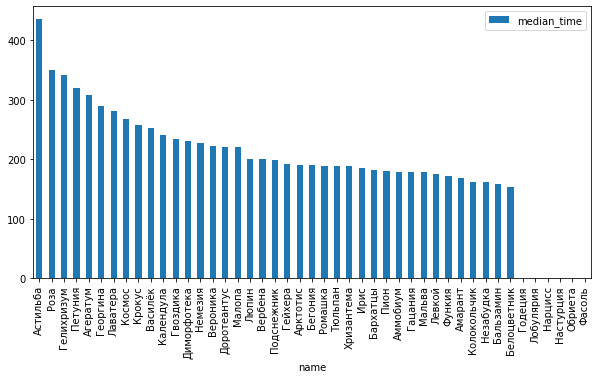

In [3]:
import pandas as pd

data = pd.read_csv('../datasets/visits.csv', sep='\t')

# фильтруем слишком быстрые и медленные заезды и АЗС
data['too_fast'] = data['time_spent'] < 60
data['too_slow'] = data['time_spent'] > 1000
too_fast_stat = data.pivot_table(index='id', values='too_fast')
good_ids = too_fast_stat.query('too_fast < 0.5')
good_data = data.query('id in @good_ids.index')
good_data = good_data.query('60 <= time_spent <= 1000')

# считаем данные по отдельным АЗС и по сетям
station_stat = data.pivot_table(index='id', values='time_spent', aggfunc='median')
good_stations_stat = good_data.pivot_table(index='id', values='time_spent', aggfunc='median')
stat = data.pivot_table(index='name', values='time_spent')
good_stat = good_data.pivot_table(index='name', values='time_spent', aggfunc='median')
stat['good_time_spent'] = good_stat['time_spent']

id_name = good_data.pivot_table(index='id', values='name', aggfunc=['first', 'count'])
id_name.columns = ['name', 'count']
station_stat_full = id_name.join(good_stations_stat)

# считаем показатели сетей из показателей АЗС,
# а не усреднённые заезды на все АЗС сети
good_stat2 = (
    station_stat_full
    .query('count > 30')
    .pivot_table(index='name', values='time_spent', aggfunc=['median', 'count'])
)
good_stat2.columns = ['median_time', 'stations']
final_stat = stat.join(good_stat2)

final_stat.sort_values(by='median_time', ascending=False)\
    .plot(kind='bar',
          y='median_time',
          figsize=(10,5))

# 2.
Предыдущий столбчатый график отображал шесть сетей АЗС без данных: «Годецию», «Лобулярию», «Нарцисс», «Обриету» и «Фасоль». Это значения NaN в final_stat, которые появились, потому что вы исключили непопулярные АЗС.
Таблица final_stat была создана объединением таблиц stat (включает все АЗС) и good_stat2 (исключает АЗС с малым числом заездов). Так как в join() по умолчанию левое соединение, индексы из final_stat будут идентичны индексам из stat. Поэтому любой индекс из таблицы stat, которого нет в таблице good_stat2, после объединения получит значение NaN. Наведите порядок в графике, удалив значения NaN.
Выполните следующие шаги, помня о бритве Оккама:
Отбросьте значения NaN в столбце median_time таблицы final_stat.
Упорядочьте таблицу final_stat по возрастанию значений в столбце median_time.
Постройте столбчатый график median_time. Задайте размер графика 10х5 дюймов. Добавьте линии сетки.

Подсказка
Отбросьте пустые значения методом dropna(), передав аргумент subset=['median_time']. Отсортируйте значения по медианной длительности.
В plot() передайте параметры y, kind, figsize и grid. В параметре y задайте название столбца, по которому будет построен график. В параметре kind укажите столбчатый тип графика: bar. Параметр figsize отвечает за размеры графика — 10х5 дюймов. Присвойте значение True параметру grid, отвечающему за линии сетки.

<AxesSubplot:xlabel='name'>

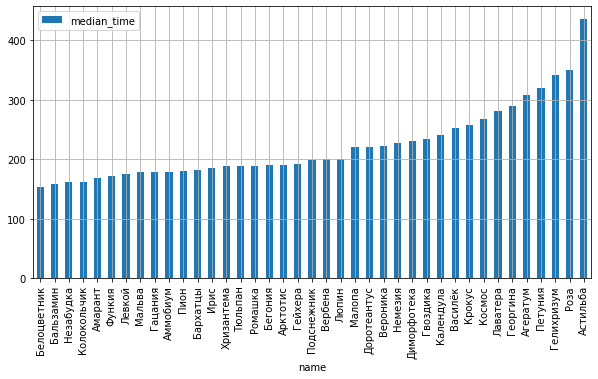

In [5]:
final_stat = final_stat.dropna(subset=['median_time'])
final_stat.sort_values(by='median_time')\
    .plot(kind='bar',
          y='median_time',
          figsize=(10,5),
          grid=True)

# 3.
До этого момента вы фильтровали данные по количеству заездов на одну АЗС и по длительности заправки. Но стоит учесть ещё одну переменную: число АЗС внутри сетей. С точки зрения маркетинга интересны и сети с большей продолжительностью заправки, и сети, в которых много АЗС. Значит, нужно исключить те сети, в которых заправочных станций мало. А для начала посмотрите, как число заправочных станций распределяется по сетям.
Используя данные из таблицы final_stat, постройте гистограмму, отображающую число АЗС внутри сетей. Поделите значения на 100 корзин.

Подсказка
Постройте гистограмму методом hist(). Найдите в final_stat столбец, где указано число АЗС в сети. Сначала передайте методу название столбца, а затем — параметр bins=.

array([[<AxesSubplot:title={'center':'stations'}>]], dtype=object)

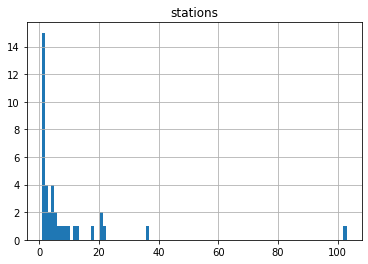

In [7]:
final_stat.hist('stations', bins=100)

# 4.
Так как с точки зрения маркетинга небольшие сети неважны, создайте новую переменную с данными только крупных сетей.
Выполните следующие шаги:
Создайте переменную big_nets_stat и поместите в неё строки из таблицы final_stat, в которых значение переменной stations больше 10.
Выведите новую переменную на экран и изучите результат.

Подсказка
Методом query() получите выборку сетей АЗС с количеством станций больше 10.

In [9]:
big_nets_stat = final_stat.query('stations > 10')
print(big_nets_stat)

             time_spent  good_time_spent  median_time  stations
name                                                           
Василёк      268.849897            264.0       252.00     103.0
Гейхера      167.445947            204.0       192.00      12.0
Календула    207.357323            254.0       240.00      36.0
Колокольчик  119.131564            161.0       161.00      21.0
Люпин        235.440937            186.0       200.00      13.0
Мальва       136.562234            182.0       177.75      22.0
Немезия      186.535207            226.0       227.50      21.0
Роза         260.877217            315.0       350.00      18.0


# 5.
Теперь можно разделить все сети на две группы: «Большая восьмёрка» и «Другие». Вторая группа будет восприниматься как одна большая сеть.
Лучшие показатели средней продолжительности заправки содержатся в таблице good_stat2 и рассчитываются по данным station_stat_full (просмотрите код, чтобы вспомнить эти вычисления). Повторите вычисления, но вместо того, чтобы группировать данные по столбцу name, сгруппируйте данные по новому столбцу, содержащему категорию Другие. Чтобы создать этот столбец в таблице station_stat_full, примените метод where() для сравнения столбца name в station_stat_full с индексами big_nets_stat.
Выполните следующие шаги:
Добавьте в таблицу station_stat_full новый столбец group_name.
Поместите в столбец group_name значения столбца name, если сеть присутствует в big_nets_stat. Если столбец name отсутствует, поместите в group_name значения из Другие.
Выведите на экран первые пять строк таблицы station_stat_full.

Подсказка
Метод where() выглядит так: where(проверяемое условие, значение при ложном условии).
Примените метод where() к station_stat_full['name']. Методом isin() проверьте, есть ли столбец name в big_nets_stat.index. Если это условие ложно, верните Другие методом where().

In [16]:
station_stat_full['group_name'] = station_stat_full['name'].where(station_stat_full['name'].isin(big_nets_stat.index), 'Другие')
print(station_stat_full.head())

                 name  count  time_spent   group_name
id                                                   
00ca1b70     Вероника    131       166.0       Другие
0178ce70      Василёк    164       234.5      Василёк
01abf4e9      Гацания     30       181.5       Другие
030a9067  Колокольчик    228       135.5  Колокольчик
03740f2d      Василёк    157       289.0      Василёк


# 6.
Итак, у вас есть столбец Другие, в котором собраны не очень крупные сети. Теперь просто повторите анализ, в процессе которого создали good_stat2, но в этот раз сгруппируйте данные по group_name.
Выполните следующие шаги:
Создайте переменную stat_grouped, которая повторяет вычисления good_stat2, но группирует по group_name.
Переименуйте столбцы в stat_grouped на time_spent и count.
Упорядочьте stat_grouped по возрастанию значений столбца time_spent. Убедитесь, что изменение постоянное, а не временное.
Выведите на экран stat_grouped.

Подсказка
Посмотрите в своём коде, как вы создавали таблицу good_stat2 и меняли названия столбцов в ней. Повторите те же действия, чтобы создать stat_grouped, но в pivot_table() укажите index=group_name. Когда будете сортировать данные методом sort_values(), используйте параметр inplace или перепишите переменную вручную. После сортировки выведите stat_grouped на экран.

In [20]:
station_stat_full

,name,count,time_spent,group_name
id,,,,
00ca1b70,Вероника,131,166.0,Другие
0178ce70,Василёк,164,234.5,Василёк
01abf4e9,Гацания,30,181.5,Другие
030a9067,Колокольчик,228,135.5,Колокольчик
03740f2d,Василёк,157,289.0,Василёк
...,...,...,...,...
fb6610be,Колокольчик,426,161.0,Колокольчик
fbbd8cc2,Роза,82,454.5,Роза
fc4b1b72,Василёк,543,340.0,Василёк


In [23]:
stat_grouped = station_stat_full.\
    query('count > 30').\
    pivot_table(index='group_name', values='time_spent', aggfunc=['median', 'count'])
stat_grouped.columns = ['time_spent','count']
stat_grouped.sort_values(by='time_spent', inplace=True)
print(stat_grouped)

             time_spent  count
group_name                    
Колокольчик      161.00     21
Мальва           177.75     22
Гейхера          192.00     12
Люпин            200.00     13
Другие           208.75    104
Немезия          227.50     21
Календула        240.00     36
Василёк          252.00    103
Роза             350.00     18


# 7.
Теперь у вас есть таблица с лучшими показателями типичной продолжительности заезда для крупных сетей АЗС. Дальше уже команде маркетинга решать, сколько сил тратить на то, чтобы завоевать «Розу» (типичная продолжительность заезда 350 секунд, 18 заправочных станций) или «Василька» (типичная продолжительность заезда 252 секунды, 103 заправочные станции). В следующем уроке вы сделаете финальную проверку, а пока визуализируйте относительную величину этих сетей с точки зрения количества заправочных станций.
По данным stat_grouped постройте круговую диаграмму с числом АЗС в каждой сети. Задайте её размер 8x8 дюймов.

Подсказка
Примените метод plot() к stat_grouped. Передайте параметру y столбец с числом АЗС: count. В параметре kind задайте круговой тип диаграммы:pie. Укажите размер 8x8 дюймов в параметре figsize.

<AxesSubplot:ylabel='count'>

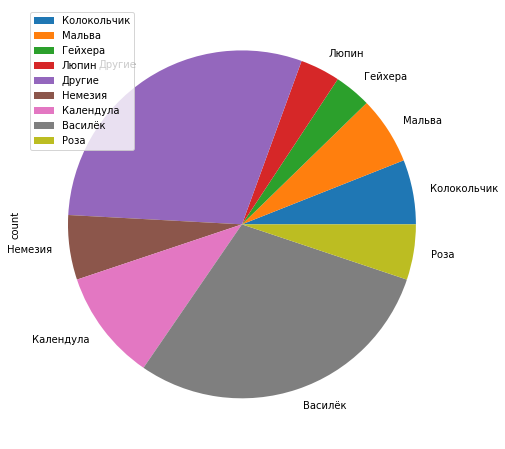

In [24]:
stat_grouped.plot(kind='pie',
                  y='count',
                  figsize=(8,8))